# Analyse data about Facebook coverage
Uses NapoleonCat service -- needs to have browser navigator libraries installed

In [1]:
import time
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# This part takes data and saves them in a csv file

import re
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

from webdriver_manager.chrome import ChromeDriverManager # NB: set up for Chrom use. For other browsers, change accordingly here and in the "driver" options below, according to https://pypi.org/project/webdriver-manager/


# Load data
df = pd.read_csv('csv/FULL_DATA1.csv')  
countries = list(df['country'].unique())
countries.append('United States of America')  # Aggiunta manuale
print(countries)

# Config BROWSER (headless)
options = Options()
options.add_argument("--headless")
options.add_argument("--disable-gpu")
options.add_argument("--window-size=1920x1080")

# Start DRIVER with webdriver-manager
from selenium.webdriver.chrome.service import Service
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=options)

# Gather data
results = []

for count in countries:
    display_country = count

    # Adjust naming
    if count == "Vietnam": 
        country = "Viet Nam"  
    elif count == "Czech Republic":
        country = "Czechia"
    else:
        country = count

    slug = country.lower().replace(" ", "_")
    url = f"https://napoleoncat.com/stats/facebook-users-in-{slug}/2021/05/" # Access NappoleonCat at desired date
    driver.get(url)
    time.sleep(4)  
    
    try:
        # Cookies agreement
        try:
            cookie_button = WebDriverWait(driver, 5).until(
                EC.element_to_be_clickable((By.XPATH, "//button[contains(., 'Allow all') or contains(., 'Accetta tutto') or contains(., 'Accept all')]"))
            )
            cookie_button.click()
            time.sleep(2)  # Attendi dopo aver cliccato i cookies
        except:
            pass  
        
        # Wait for element with number of users to be visible 
        WebDriverWait(driver, 10).until(
            EC.visibility_of_element_located((By.XPATH, "//*[contains(text(), 'Facebook users in')]"))
        )
        
        # Get page text
        page_text = driver.find_element(By.TAG_NAME, "body").text

        # Extract numbers
        penetration_match = re.search(r"which accounted for ([\d.]+)%", page_text)

        if penetration_match:
            penetration = penetration_match.group(1) 
        else:
            penetration = "N/A"

        results.append([display_country, penetration])
    except Exception as e:
        print(f"Errore per {country}: {e}")
        results.append([country, "Errore"])

driver.quit()

# Save results in CSV
with open("csv/facebook_data_2021.csv", mode="w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerow(["country", "Percentage of the population that use Facebook 05-2021"])
    writer.writerows(results)

print("CSV file saved as 'facebook_data_2021.csv'")

In [ ]:
#selenium
# Config BROWSER (headless)
options = Options()
options.add_argument("--headless")
options.add_argument("--disable-gpu")
options.add_argument("--window-size=1920x1080")

# start DRIVER CON webdriver-manager
from selenium.webdriver.chrome.service import Service
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=options)

# gather data
results = []

for count in countries:
    display_country = count
    if count == "Vietnam": 
        country = "Viet Nam" 
    elif count == "Czech Republic":
        country = "Czechia"
    else:
        country = count

    slug = country.lower().replace(" ", "_")
    url = f"https://napoleoncat.com/stats/facebook-users-in-{slug}/2022/06/"
    driver.get(url)
    time.sleep(4)  
    
    try:
        # Cookies
        try:
            cookie_button = WebDriverWait(driver, 5).until(
                EC.element_to_be_clickable((By.XPATH, "//button[contains(., 'Allow all') or contains(., 'Accetta tutto') or contains(., 'Accept all')]"))
            )
            cookie_button.click()
            time.sleep(2)  # wait
        except:
            pass  # 
        
        # wait
        WebDriverWait(driver, 10).until(
            EC.visibility_of_element_located((By.XPATH, "//*[contains(text(), 'Facebook users in')]"))
        )
        
        # get text
        page_text = driver.find_element(By.TAG_NAME, "body").text

        # extract numbers
        penetration_match = re.search(r"which accounted for ([\d.]+)%", page_text)

        if penetration_match:
            penetration = penetration_match.group(1) 
        else:
            penetration = "N/A"

        results.append([display_country, penetration])
    except Exception as e:
        print(f"Errore per {country}: {e}")
        results.append([country, "Errore"])

driver.quit()

df=pd.read_csv("csv/facebook_data_2021.csv")
results_df = pd.DataFrame(results, columns=["country", "percentage"])
df["Percentage of population that use Facebook 06-2022"]=results_df["percentage"]
df.to_csv("csv/facebook_data_2021.csv", index=False)

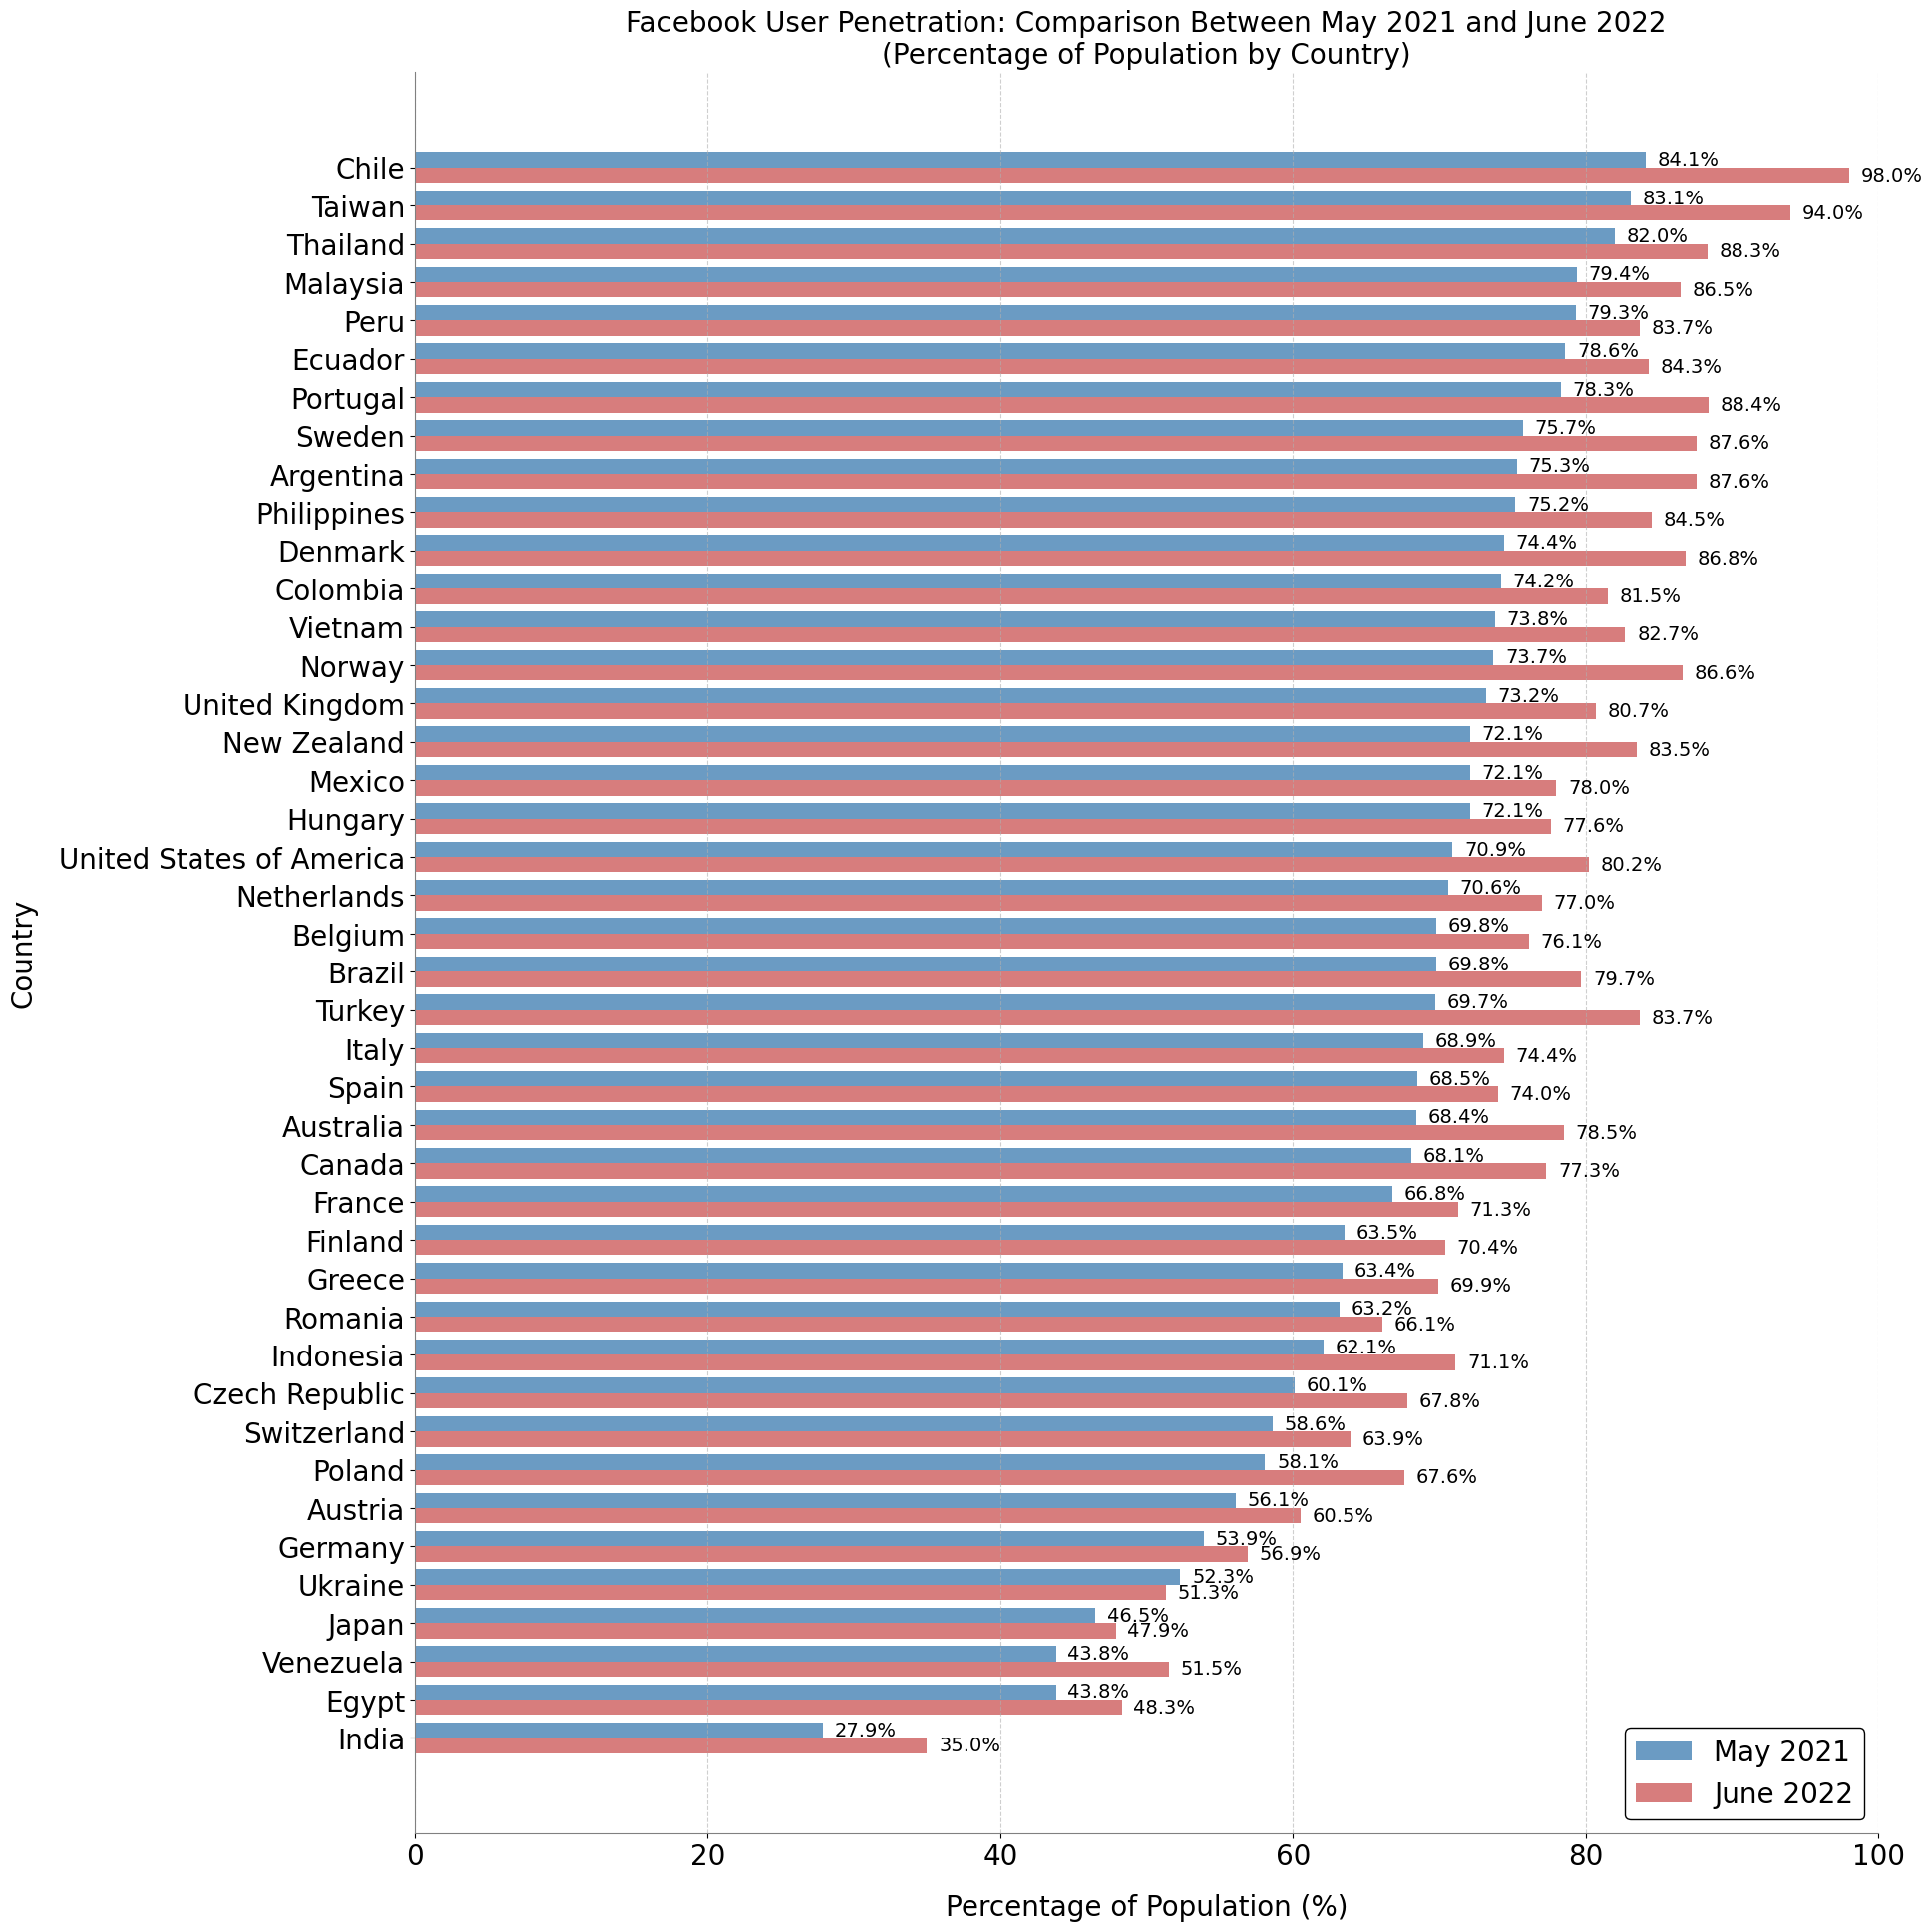

<Figure size 640x480 with 0 Axes>

In [5]:
# If data are already stored, we can skip the previous cells and run this one directly

df = pd.read_csv('csv/facebook_data_2021.csv') 
df['Percentage_2021'] = df['Percentage of the population that use Facebook 05-2021'].astype(float)
df['Percentage_2022'] = df['Percentage of population that use Facebook 06-2022'].astype(float)

df = df.sort_values(by='Percentage_2021', ascending=False)
# plot
plt.figure(figsize=(20, 20))  
plt.rcParams['font.family'] = 'sans-serif' 
bar_height = 0.4
y_pos = np.arange(len(df["country"]))


# barplot
bars_2021 = plt.barh(y_pos - bar_height/2, df['Percentage_2021'], 
                    height=bar_height, color="steelblue", alpha=0.8, label='May 2021')

bars_2022 = plt.barh(y_pos + bar_height/2, df['Percentage_2022'], 
                    height=bar_height, color="indianred", alpha=0.8, label='June 2022')

# Add percentages
for bars in [bars_2021, bars_2022]:
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 0.8, bar.get_y() + bar.get_height()/2,
                f'{width:.1f}%', 
                va='center', 
                ha='left',
                fontsize=14)

# Config axes and labels
ax = plt.gca()
ax.set_yticks(y_pos)
ax.set_yticklabels(df["country"])  
ax.invert_yaxis()  


plt.title("Facebook User Penetration: Comparison Between May 2021 and June 2022\n(Percentage of Population by Country)", 
          fontsize=20)
plt.xlabel("Percentage of Population (%)",fontsize=20, labelpad=16)
plt.ylabel("Country", fontsize=20, labelpad=15)


plt.xlim(0, 100)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Legend setting
legend = plt.legend(fontsize=20, 
                   loc='lower right',
                   frameon=True,
                   framealpha=1,
                   edgecolor='black')
legend.get_frame().set_linewidth(1.0)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.tick_params(axis='both', which='major', labelsize=20)


plt.tight_layout(pad=3.0)
plt.show()


### Execute filtering of 50% coverage

In [7]:
# Delete countries with coverage less tha 50%
facebook_data = pd.read_csv("csv/facebook_data_2021.csv")
facebook_data = facebook_data[facebook_data["Percentage of the population that use Facebook 05-2021"] != "Errore"]
facebook_data["Percentage of the population that use Facebook 05-2021"] = facebook_data["Percentage of the population that use Facebook 05-2021"].astype(float)
low_usage_countries = facebook_data[facebook_data["Percentage of the population that use Facebook 05-2021"] < 50]["country"].tolist()

# Update file FULL_DATA2.csv
full_data = pd.read_csv("csv/FULL_DATA2.csv")
filtered_full_data = full_data[~full_data["country"].isin(low_usage_countries)]
filtered_full_data.to_csv("csv/FULL_DATA3.csv", index=False)